<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/predict_employee_absenteeism_xgboost_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/Absenteeism_at_work_Project%20-%20Absenteeism_at_work.csv')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,"239,554",97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,"239,554",97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,"239,554",97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,"239,554",97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,"239,554",97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               737 non-null    float64
 2   Month of absence                 739 non-null    float64
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           733 non-null    float64
 6   Distance from Residence to Work  737 non-null    float64
 7   Service time                     737 non-null    float64
 8   Age                              737 non-null    float64
 9   Work load Average/day            730 non-null    object 
 10  Hit target                       734 non-null    float64
 11  Disciplinary failure             734 non-null    float64
 12  Education             

In [4]:
pd.set_option("display.float_format", "{:.2f}".format)
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.00,737.00,739.00,740.00,740.00,733.00,737.00,737.00,737.00,734.00,734.00,730.00,734.00,737.00,736.00,738.00,739.00,726.00,709.00,718.00
mean,18.02,19.19,6.32,3.91,2.54,221.04,29.67,12.57,36.45,94.59,0.05,1.30,1.02,0.57,0.07,0.75,79.06,172.15,26.68,6.98
std,11.02,8.44,3.44,1.42,1.11,66.95,14.85,4.39,6.48,3.79,0.22,0.68,1.09,0.50,0.26,1.32,12.87,6.08,4.29,13.48
min,1.00,0.00,0.00,2.00,1.00,118.00,5.00,1.00,27.00,81.00,0.00,1.00,0.00,0.00,0.00,0.00,56.00,163.00,19.00,0.00
25%,9.00,13.00,3.00,3.00,2.00,179.00,16.00,9.00,31.00,93.00,0.00,1.00,0.00,0.00,0.00,0.00,69.00,169.00,24.00,2.00
50%,18.00,23.00,6.00,4.00,3.00,225.00,26.00,13.00,37.00,95.00,0.00,1.00,1.00,1.00,0.00,0.00,83.00,170.00,25.00,3.00
75%,28.00,26.00,9.00,5.00,4.00,260.00,50.00,16.00,40.00,97.00,0.00,1.00,2.00,1.00,0.00,1.00,89.00,172.00,31.00,8.00
max,36.00,28.00,12.00,6.00,4.00,388.00,52.00,29.00,58.00,100.00,1.00,4.00,4.00,1.00,1.00,8.00,108.00,196.00,38.00,120.00


In [5]:
for column in data.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {data[column].nunique()}")

===============Column: ID==============
Number of unique values: 36
===============Column: Reason for absence==============
Number of unique values: 28
===============Column: Month of absence==============
Number of unique values: 13
===============Column: Day of the week==============
Number of unique values: 5
===============Column: Seasons==============
Number of unique values: 4
===============Column: Transportation expense==============
Number of unique values: 24
===============Column: Distance from Residence to Work==============
Number of unique values: 25
===============Column: Service time==============
Number of unique values: 18
===============Column: Age==============
Number of unique values: 22
===============Column: Work load Average/day ==============
Number of unique values: 38
===============Column: Hit target==============
Number of unique values: 13
===============Column: Disciplinary failure==============
Number of unique values: 2
===============Column: Education=

In [6]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

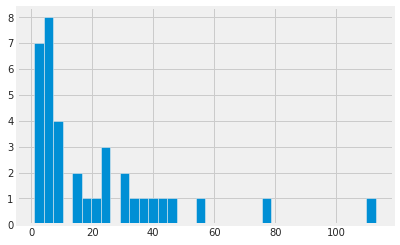

In [7]:
data.ID.value_counts().hist(bins=data.ID.nunique())

In [8]:
data.drop('ID', axis=1, inplace=True)

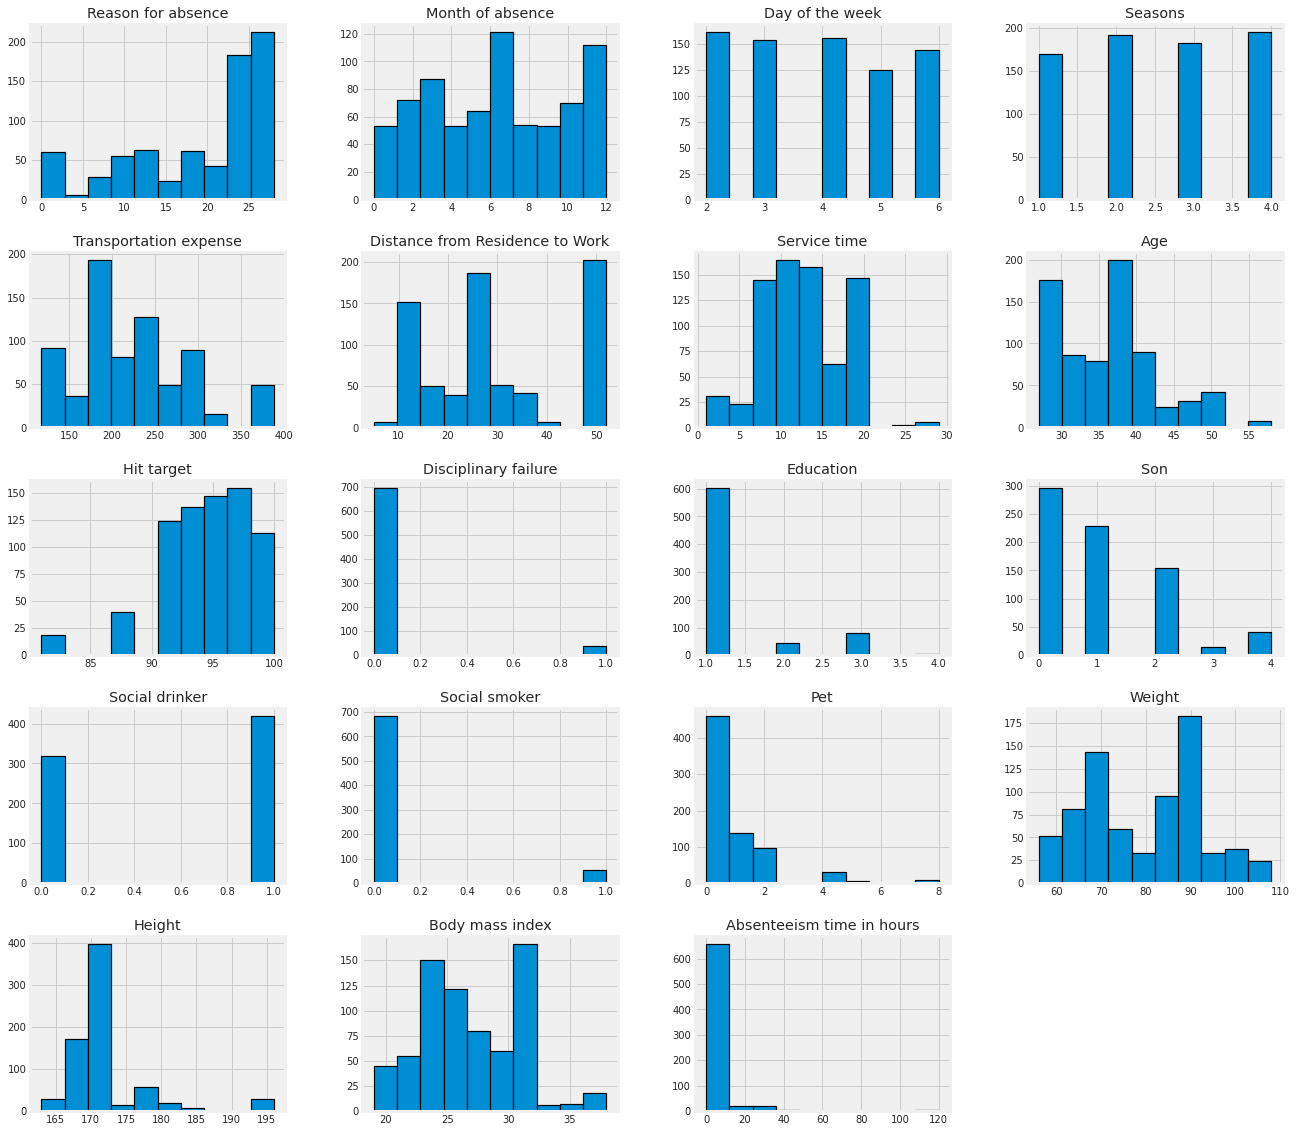

In [9]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [10]:
print(f"{data['Absenteeism time in hours'].value_counts()}")
print(f"{data['Absenteeism time in hours'].value_counts()[0] / data['Absenteeism time in hours'].value_counts()[1]}")

8.00      199
2.00      155
3.00      110
1.00       88
4.00       60
0.00       36
16.00      19
24.00      16
40.00       7
5.00        7
32.00       5
64.00       3
80.00       3
120.00      3
56.00       2
112.00      2
104.00      1
7.00        1
48.00       1
Name: Absenteeism time in hours, dtype: int64
0.4090909090909091


In [11]:
data["Reason for absence"].value_counts()

23.00    149
28.00    110
27.00     69
13.00     55
0.00      43
19.00     40
22.00     37
26.00     33
25.00     31
11.00     26
10.00     25
18.00     21
14.00     19
1.00      16
7.00      15
6.00       8
12.00      8
8.00       6
21.00      6
9.00       4
24.00      3
5.00       3
16.00      3
15.00      2
4.00       2
2.00       1
17.00      1
3.00       1
Name: Reason for absence, dtype: int64

In [12]:
data["Reason for absence"] = data["Reason for absence"].map({0: "Group_1", 1: "Group_1", 2: "Group_1", 3: "Group_1", 
                                                             4: "Group_1", 5: "Group_1", 6: "Group_1", 7: "Group_1", 
                                                             8: "Group_1", 9: "Group_1", 10: "Group_1", 11: "Group_1", 
                                                             12: "Group_1", 13: "Group_1", 14: "Group_1", 15: "Group_2", 
                                                             16: "Group_2", 17: "Group_2", 17: "Group_2", 18: "Group_3", 
                                                             19: "Group_3", 20: "Group_3", 21: "Group_3", 22: "Group_4", 
                                                             23: "Group_4", 24: "Group_4", 25: "Group_4", 26: "Group_4", 
                                                             27: "Group_4", 28: "Group_4"})
# data["Reason for Absence"] = data["Reason for Absence"].astype("category").cat.codes
data["Reason for absence"].value_counts()

Group_4    432
Group_1    232
Group_3     67
Group_2      6
Name: Reason for absence, dtype: int64

In [13]:
data_1 = pd.get_dummies(data, columns=['Reason for absence'])

In [14]:
data_1.head()

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Reason for absence_Group_1,Reason for absence_Group_2,Reason for absence_Group_3,Reason for absence_Group_4
0,7.00,3,1,289.00,36.00,13.00,33.00,"239,554",97.00,0.00,1.00,2.00,1.00,0.00,1.00,90.00,172.00,30.00,4.00,0,0,0,1
1,7.00,3,1,118.00,13.00,18.00,50.00,"239,554",97.00,1.00,1.00,1.00,1.00,0.00,0.00,98.00,178.00,31.00,0.00,1,0,0,0
2,7.00,4,1,179.00,51.00,18.00,38.00,"239,554",97.00,0.00,1.00,0.00,1.00,0.00,0.00,89.00,170.00,31.00,2.00,0,0,0,1
3,7.00,5,1,279.00,5.00,14.00,39.00,"239,554",97.00,0.00,1.00,2.00,1.00,1.00,0.00,68.00,168.00,24.00,4.00,1,0,0,0
4,7.00,5,1,289.00,36.00,13.00,33.00,"239,554",97.00,0.00,1.00,2.00,1.00,0.00,1.00,90.00,172.00,30.00,2.00,0,0,0,1


In [15]:
data_1.dtypes

Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day               object
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
Reason for absence_Group_1           uint8
Reason for absence_Group_2           uint8
Reason for absence_Group_3           uint8
Reason for absence_Group_4           uint8
dtype: obje

In [16]:
data_1.dropna(inplace=True)
data_1.isna().sum()

Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
Reason for absence_Group_1         0
Reason for absence_Group_2         0
Reason for absence_Group_3         0
Reason for absence_Group_4         0
dtype: int64

In [17]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})

In [18]:
data_1.Education.value_counts()

0    525
1    117
Name: Education, dtype: int64

In [19]:
data_1.Education.isna().sum()

0

In [20]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)
data_2.columns

Index(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Son', 'Social drinker', 'Social smoker', 'Pet',
       'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours',
       'Reason for absence_Group_1', 'Reason for absence_Group_2',
       'Reason for absence_Group_3', 'Reason for absence_Group_4',
       'Education_1'],
      dtype='object')

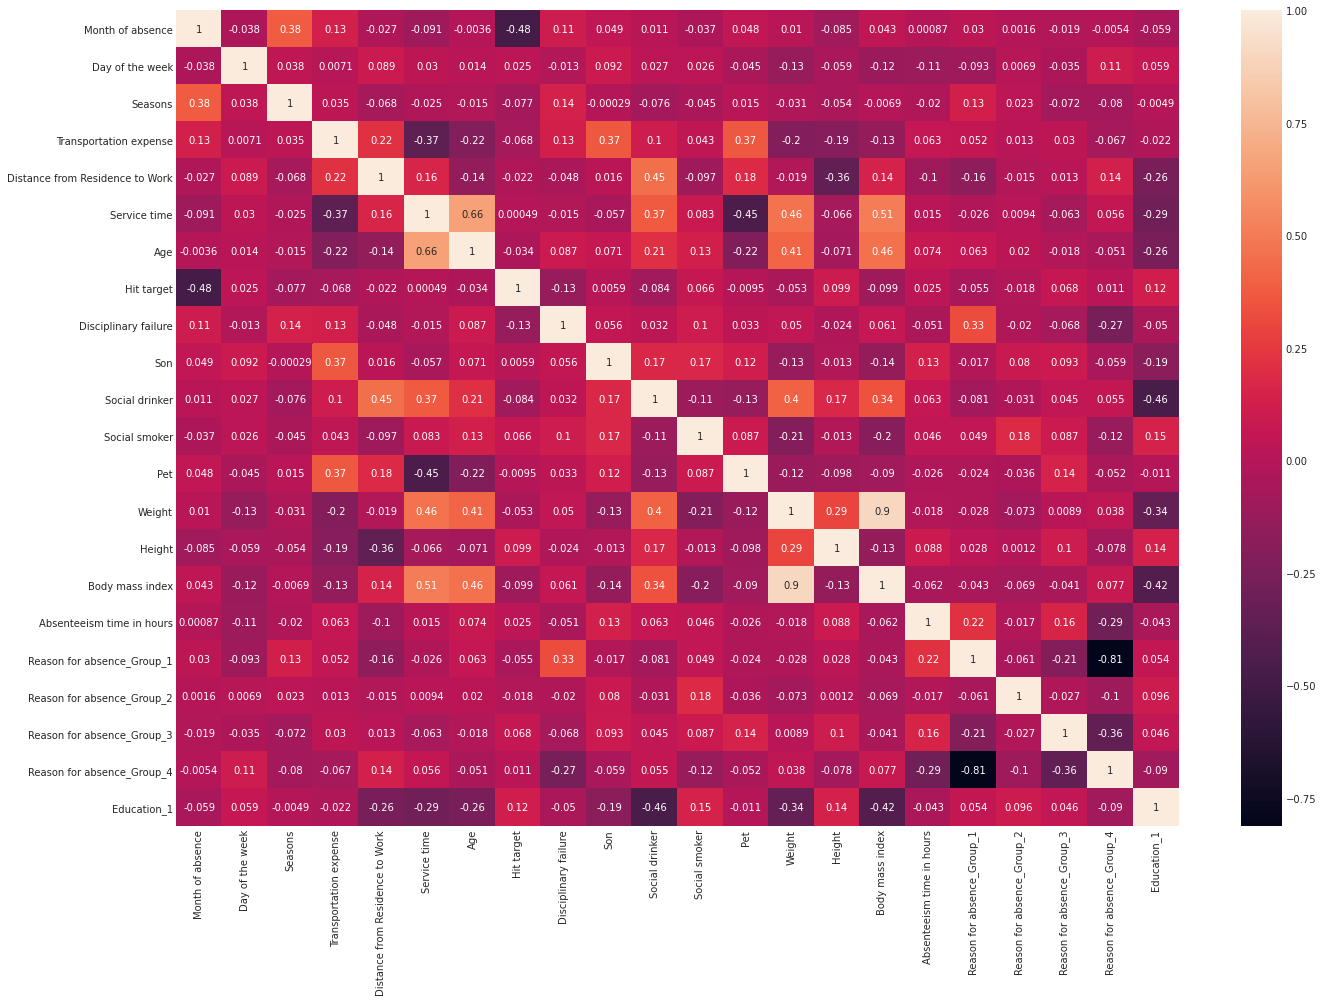

In [21]:
plt.figure(figsize=(20, 15))
sns.heatmap(data_2.corr(), annot=True)

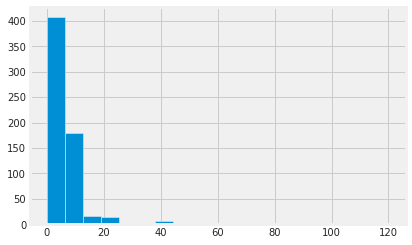

In [22]:
data_2['Absenteeism time in hours'].hist(bins=data_2['Absenteeism time in hours'].nunique())